In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("Mall_Customers.csv")

# Inspect the data
print(data.head())

# Encode the categorical variable (Gender)
label_encoder = LabelEncoder()
data['Gender_encoded'] = label_encoder.fit_transform(data['Gender'])

# Select features for clustering
features = ['Age', 'Gender_encoded', 'Annual Income (k$)', 'Spending Score (1-100)']
data_features = data[features]

# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# Check the scaled data
print(data_scaled[:5])


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
[[-1.42456879  1.12815215 -1.73899919 -0.43480148]
 [-1.28103541  1.12815215 -1.73899919  1.19570407]
 [-1.3528021  -0.88640526 -1.70082976 -1.71591298]
 [-1.13750203 -0.88640526 -1.70082976  1.04041783]
 [-0.56336851 -0.88640526 -1.66266033 -0.39597992]]


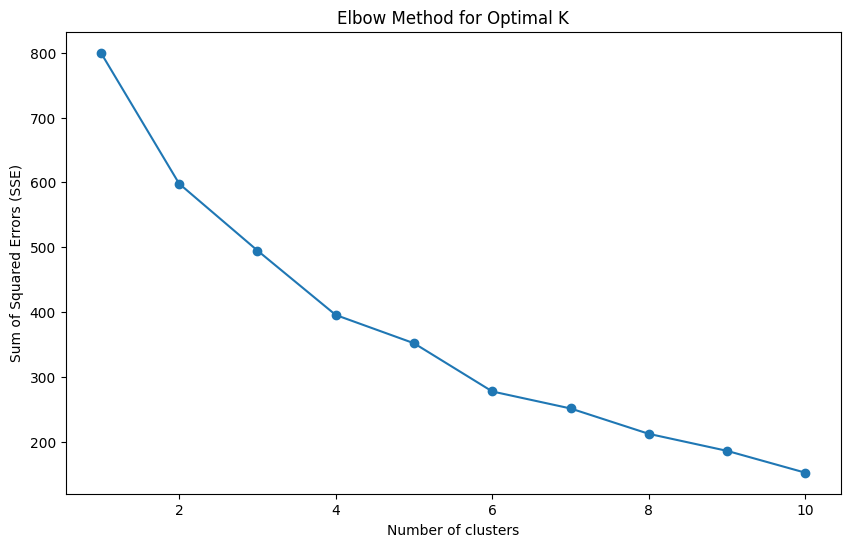

In [5]:
# Determine the optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [6]:
# Apply K-means with the chosen number of clusters
optimal_k = 4  # For example, if the elbow is at 4 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Inspect the data with cluster labels
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Gender_encoded  Cluster  
0               1        2  
1               1        2  
2               0        3  
3               0        3  
4               0        3  


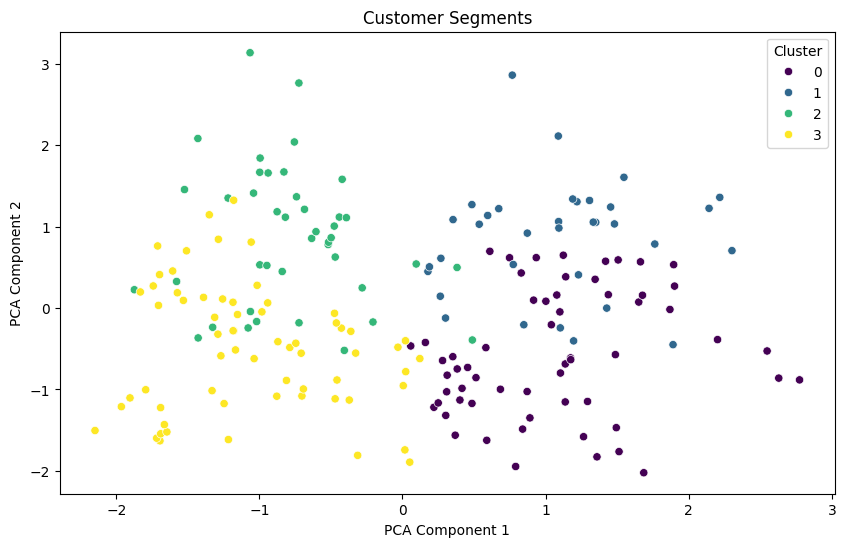

In [7]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame for visualization
data_vis = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_vis['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_vis, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
